In [2]:
# Downloading the dataset

import seisbench.data as sbd

dataset = sbd.STEAD()
print(len(dataset))

/home/namithk/miniconda3/envs/eew/lib/python3.9/site-packages/seisbench/__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
2026-02-27 16:23:25,835 | seisbench | WARNING | Output component order not specified, defaulting to 'ZNE'.


1265657


In [ ]:
# Inspecting the dataset
import pandas as pd
print(type(dataset))
print('columns: \n',dataset.metadata.columns)
print('Sample of the dataset: \n',dataset.metadata.head(1))

# print(pd.DataFrame(dataset.metadata.head(1)))

<class 'seisbench.data.stead.STEAD'>
columns: 
 Index(['index', 'station_network_code', 'station_code', 'trace_channel',
       'station_latitude_deg', 'station_longitude_deg', 'station_elevation_m',
       'trace_p_arrival_sample', 'trace_p_status', 'trace_p_weight',
       'path_p_travel_sec', 'trace_s_arrival_sample', 'trace_s_status',
       'trace_s_weight', 'source_id', 'source_origin_time',
       'source_origin_uncertainty_sec', 'source_latitude_deg',
       'source_longitude_deg', 'source_error_sec', 'source_gap_deg',
       'source_horizontal_uncertainty_km', 'source_depth_km',
       'source_depth_uncertainty_km', 'source_magnitude',
       'source_magnitude_type', 'source_magnitude_author',
       'source_mechanism_strike_dip_rake', 'source_distance_deg',
       'source_distance_km', 'path_back_azimuth_deg', 'trace_snr_db',
       'trace_coda_end_sample', 'trace_start_time', 'trace_category',
       'trace_name', 'split', 'trace_name_original', 'trace_chunk',
       'trace_

In [4]:
# Exploring the dataset
import torch
import numpy as np
import matplotlib.pyplot as plt

dataset = sbd.STEAD()

print("Total samples:", len(dataset))

# Access metadata row
metadata = dataset.metadata.iloc[0]
print(metadata)

# Access waveform separately
waveform = dataset.get_waveforms([0])
print("Waveform shape:", waveform.shape)

2026-02-26 12:17:48,763 | seisbench | WARNING | Output component order not specified, defaulting to 'ZNE'.


Total samples: 1265657
index                                                     0
station_network_code                                     TA
station_code                                           109C
trace_channel                                            HH
station_latitude_deg                                32.8889
station_longitude_deg                             -117.1051
station_elevation_m                                   150.0
trace_p_arrival_sample                                  NaN
trace_p_status                                          NaN
trace_p_weight                                          NaN
path_p_travel_sec                                       NaN
trace_s_arrival_sample                                  NaN
trace_s_status                                          NaN
trace_s_weight                                          NaN
source_id                                               NaN
source_origin_time                                      NaN
source_origin_unc

In [6]:
print(dataset.metadata["trace_category"].unique())

['noise' 'earthquake_local']


In [17]:
print(dataset.metadata["trace_category"].value_counts())

trace_category
earthquake_local    1030231
noise                235426
Name: count, dtype: int64


In [18]:
# Find first earthquake sample
eq_indices = np.where(
    dataset.metadata["trace_category"] == "earthquake_local"
)[0]

print("First earthquake index:", eq_indices[0])

# Inspect that sample
idx = eq_indices[0]

metadata = dataset.metadata.iloc[idx]
waveform = dataset.get_waveforms([idx])

print(metadata[["trace_category",
                "trace_p_arrival_sample",
                "trace_s_arrival_sample",
                "source_magnitude"]])

print("Waveform shape:", waveform.shape)

First earthquake index: 235426
trace_category            earthquake_local
trace_p_arrival_sample               700.0
trace_s_arrival_sample              1894.0
source_magnitude                       3.6
Name: 235426, dtype: object
Waveform shape: (1, 3, 6000)


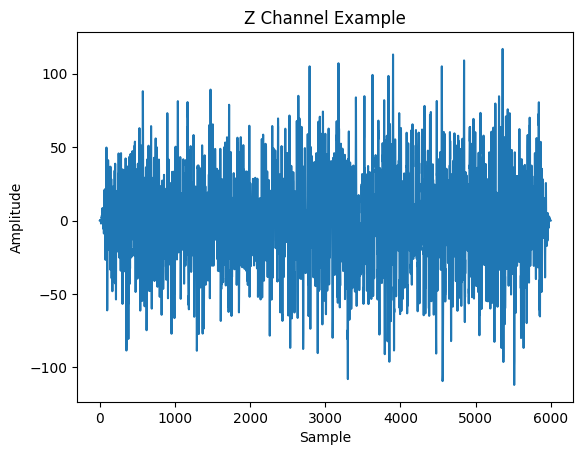

In [19]:
import matplotlib.pyplot as plt

# Get waveform for sample 0
waveform = dataset.get_waveforms([0])  # shape: (1, 3, 6000)

# Remove batch dimension
waveform = waveform[0]  # shape: (3, 6000)

# Plot Z channel (channel 0)
plt.plot(waveform[0])
plt.title("Z Channel Example")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

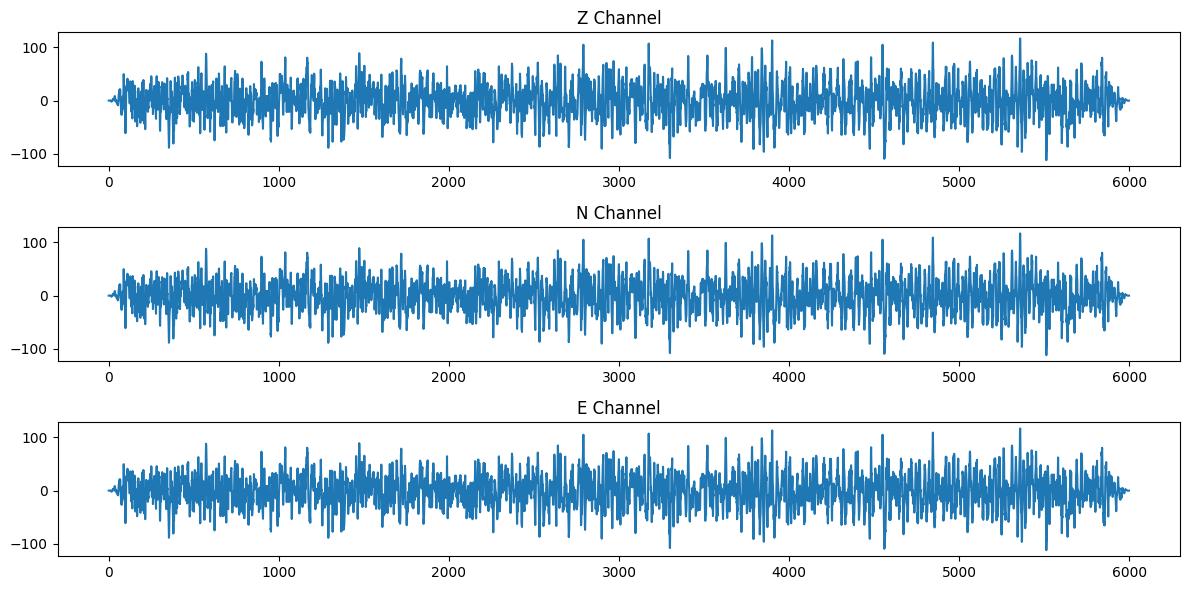

In [ ]:
# plotting the waveforms
plt.figure(figsize=(12,6))

plt.subplot(3,1,1)
plt.plot(waveform[0])
plt.title("Z Channel")

plt.subplot(3,1,2)
plt.plot(waveform[1])
plt.title("N Channel")

plt.subplot(3,1,3)
plt.plot(waveform[2])
plt.title("E Channel")

plt.tight_layout()
plt.show()

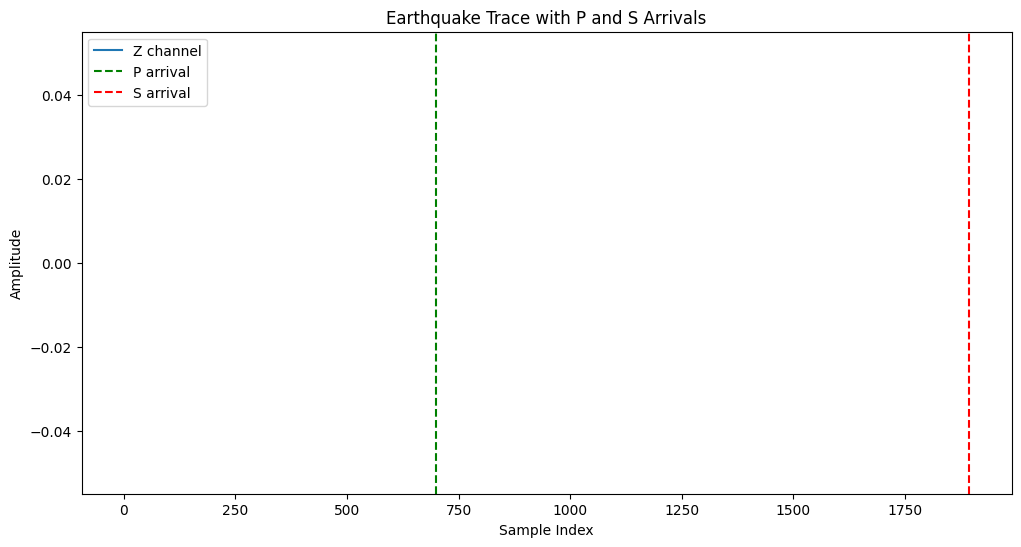

In [22]:
import matplotlib.pyplot as plt

wave = waveform[0]  # remove batch dimension

p_sample = int(metadata["trace_p_arrival_sample"])
s_sample = int(metadata["trace_s_arrival_sample"])

plt.figure(figsize=(12,6))

plt.plot(wave[0], label="Z channel")

plt.axvline(p_sample, color='g', linestyle='--', label="P arrival")
plt.axvline(s_sample, color='r', linestyle='--', label="S arrival")

plt.legend()
plt.title("Earthquake Trace with P and S Arrivals")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()